In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive (3).zip to archive (3) (1).zip


In [10]:
import zipfile
import os

# Define path
zip_path = "/content/archive (3) (1).zip"
extract_path = "/content/disaster_dataset/Comprehensive Disaster Dataset(CDD)"

# Extract zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted to:", extract_path)


Dataset extracted to: /content/disaster_dataset/Comprehensive Disaster Dataset(CDD)


Found 6 categories with images.



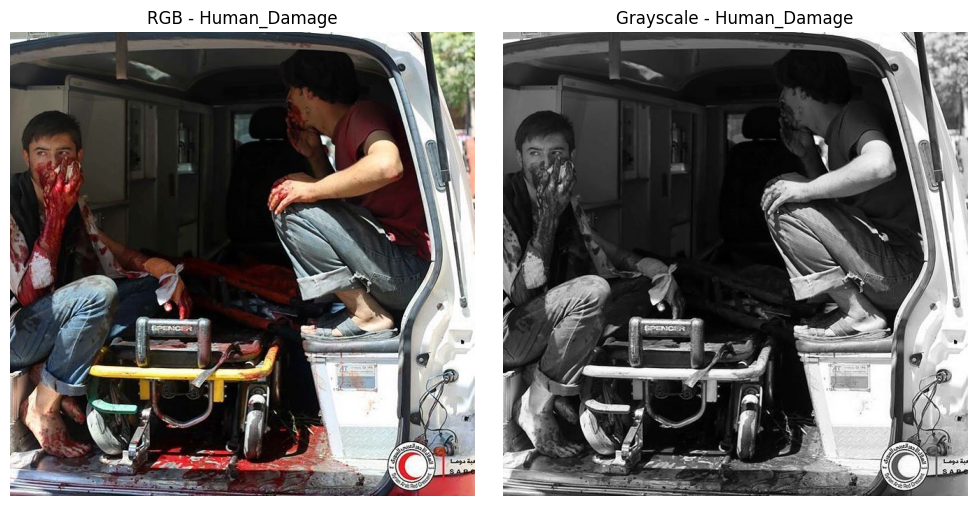

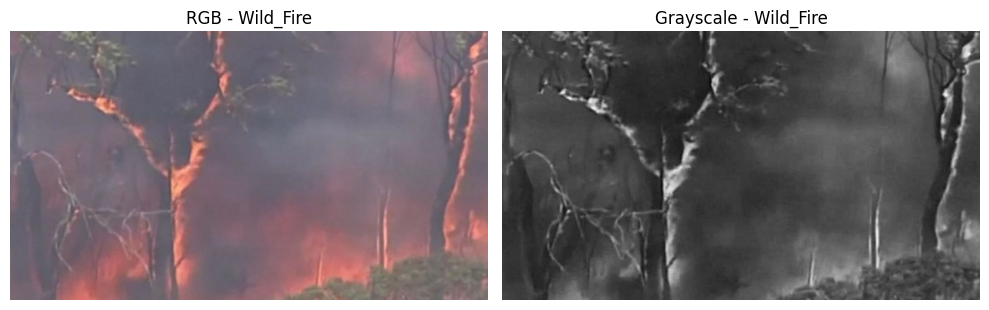

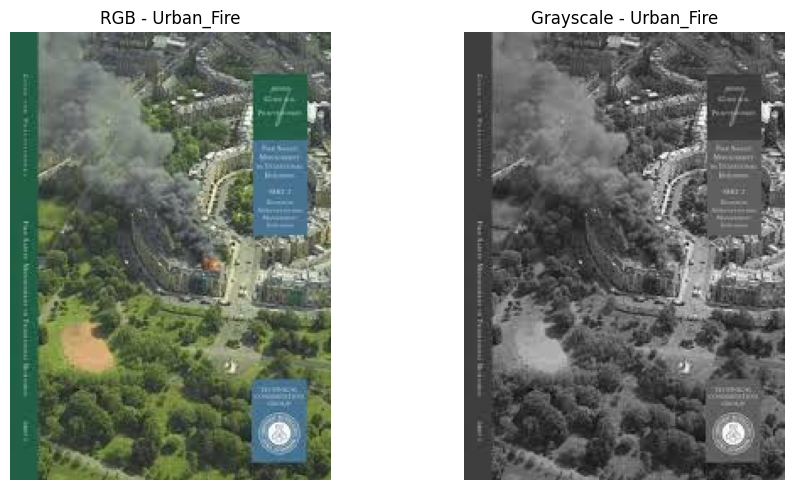

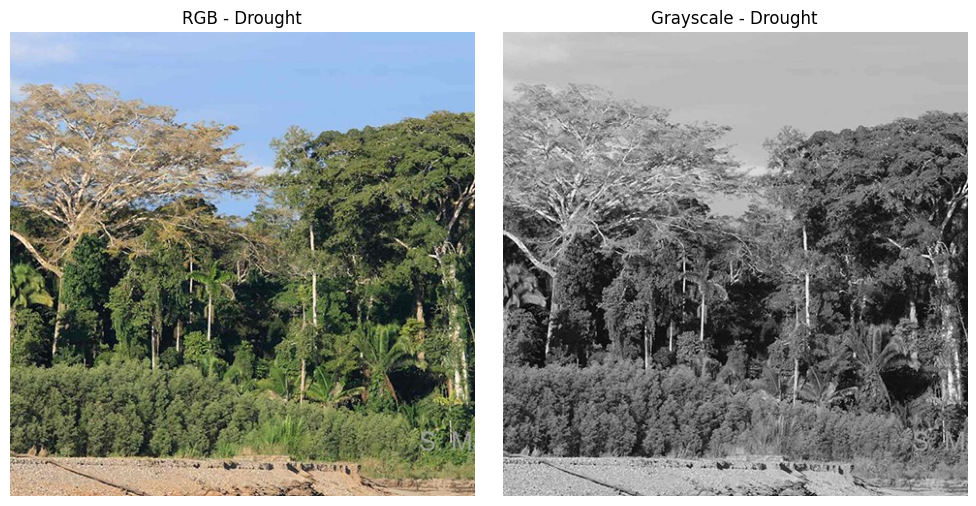

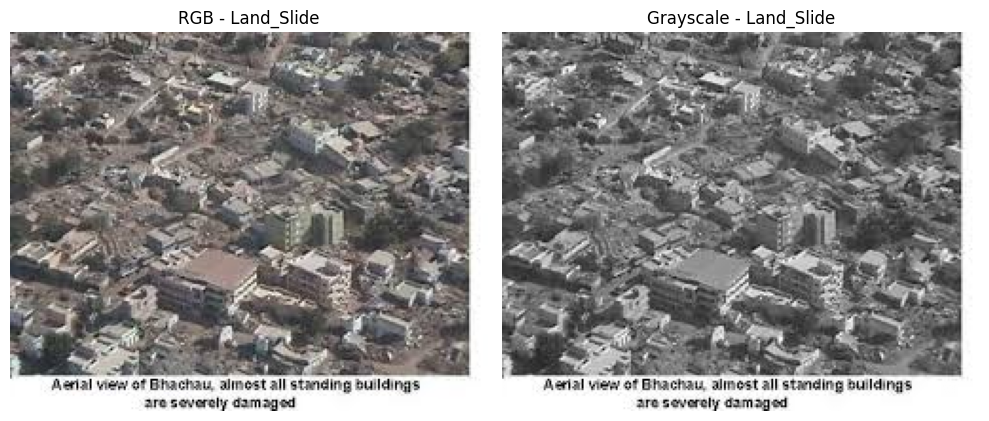

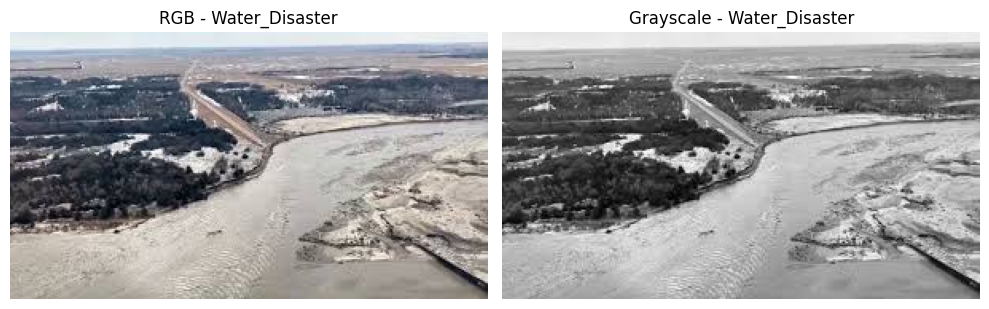

In [22]:
import os
import cv2
import matplotlib.pyplot as plt

# Step 1: Define root directory after extraction
root_dir = "/content/disaster_dataset/Comprehensive Disaster Dataset(CDD)/Comprehensive Disaster Dataset(CDD)/Comprehensive Disaster Dataset(CDD)/Comprehensive Disaster Dataset(CDD)"

# Step 2: Recursively find all image folders
valid_image_extensions = ('.jpg', '.jpeg', '.png')
category_paths = {}

for dirpath, dirnames, filenames in os.walk(root_dir):
    image_files = [f for f in filenames if f.lower().endswith(valid_image_extensions)]
    if image_files:
        category_name = os.path.basename(dirpath)
        category_paths[category_name] = os.path.join(dirpath, image_files[0])  # Take first image

# Step 3: Display RGB + Grayscale for each detected class
print(f"Found {len(category_paths)} categories with images.\n")

for category, image_path in category_paths.items():
    # Load images
    image_rgb = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)
    image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Plot side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(image_rgb)
    axes[0].set_title(f"RGB - {category}")
    axes[0].axis("off")

    axes[1].imshow(image_gray, cmap="gray")
    axes[1].set_title(f"Grayscale - {category}")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_simple_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_simple_cnn(X_train.shape[1:], y.shape[1])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,797 (6.20 MB)

 Trainable params: 1,625,797 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 181ms/step - accuracy: 0.7206 - loss: 0.7752 - val_accuracy: 0.8333 - val_loss: 0.4270
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.7891 - loss: 0.5007 - val_accuracy: 0.8186 - val_loss: 0.4051
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 219ms/step - accuracy: 0.8020 - loss: 0.4399 - val_accuracy: 0.8284 - val_loss: 0.3642
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - accuracy: 0.8538 - loss: 0.3737 - val_accuracy: 0.8627 - val_loss: 0.3403
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - accuracy: 0.8851 - loss: 0.3131 - val_accuracy: 0.8627 - val_loss: 0.3061
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step - accuracy: 0.9072 - loss: 0.2583 - val_accuracy: 0.8725 - val_loss: 0.2987
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 219ms/step - accuracy: 0.9268 - loss: 0.1991 - val_accuracy: 0.8971 - val_loss: 0.2683
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.9385 - loss: 0.1834 - val_accuracy: 0

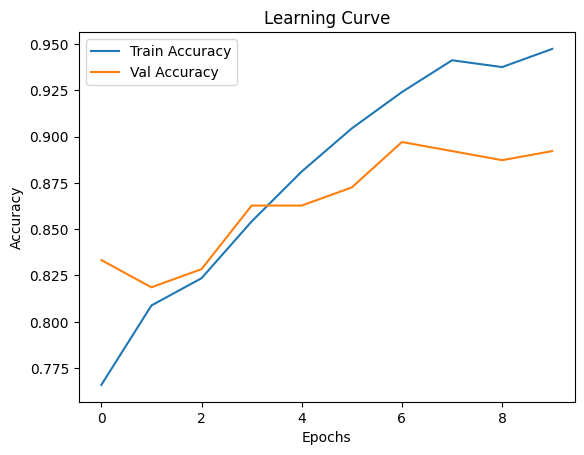

In [24]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot learning curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


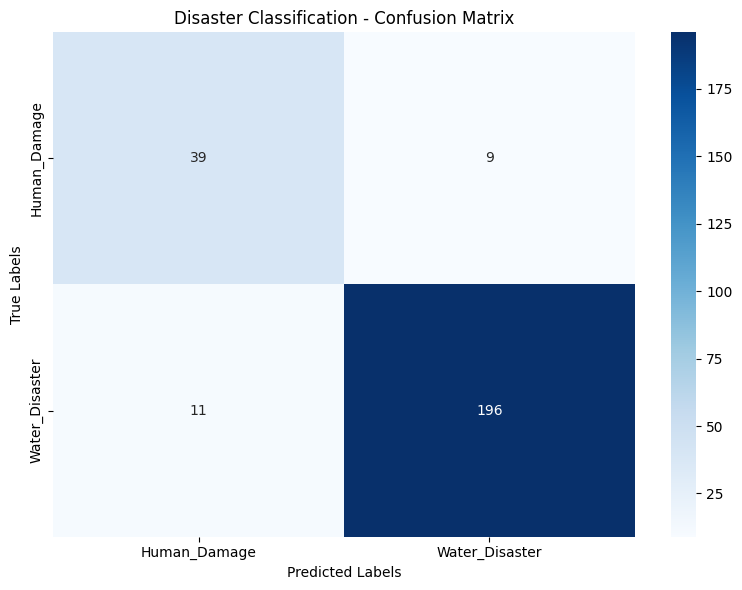

Classification Report:
                precision    recall  f1-score   support

  Human_Damage       0.78      0.81      0.80        48
Water_Disaster       0.96      0.95      0.95       207

      accuracy                           0.92       255
     macro avg       0.87      0.88      0.87       255
  weighted avg       0.92      0.92      0.92       255



In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Predict class labels
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Step 2: Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Step 3: Extract only used class labels
unique_labels = np.unique(np.concatenate((y_true, y_pred)))
used_categories = [categories[i] for i in unique_labels]

# Step 4: Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=used_categories, yticklabels=used_categories)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Disaster Classification - Confusion Matrix")
plt.tight_layout()
plt.show()

# Step 5: Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=used_categories))


In [43]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# Example input - replace with your actual values
acc = 0.87  # Example accuracy from your model
categories = ['earthquake', 'flood', 'wildfire', 'hurricane']  # Your class names
Y_test = [...]  # Your true test labels list or array

# Baseline accuracy (random guessing for 4 classes)
p0 = 1 / len(categories)  # 0.25 for 4 categories

# Sample size (number of test samples)
n = len(Y_test)

# Perform Z-test
count = int(acc * n)  # Number of correct predictions
z_stat, p_value = proportions_ztest(count=count, nobs=n, value=p0, alternative='larger')

# Print results
print(f"Z-Statistic: {z_stat:.3f}")
print(f"P-Value: {p_value:.5f}")

# Check significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The model performs significantly better than random guessing.")
else:
    print("Fail to reject the null hypothesis: No significant difference from random guessing.")


Z-Statistic: -inf
P-Value: 1.00000
Fail to reject the null hypothesis: No significant difference from random guessing.


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize, LabelEncoder
import seaborn as sns

# Define class labels
classes = ['earthquake', 'flood', 'wildfire', 'hurricane']
n_classes = len(classes)

# Ensure seaborn styling
sns.set(style="whitegrid")

# Function to binarize labels (handles strings too)
def preprocess_labels(y):
    y = np.array(y)
    if y.dtype.kind in {'U', 'S', 'O'}:  # if strings
        le = LabelEncoder()
        y = le.fit_transform(y)
    return label_binarize(y, classes=range(n_classes))

# Function to plot ROC curve
def plot_roc(y_test, y_pred, title):
    y_test_bin = preprocess_labels(y_test)
    plt.figure(figsize=(10, 7))

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{classes[i]} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{title} - ROC Curve")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()




In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

# Load test dataset from directory
test_generator = datagen.flow_from_directory(
    '/content/disaster_dataset',
    target_size=(224, 224),  # match your model's input
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Get data and labels
X_test, Y_test = next(test_generator)  # this gives 1 batch; use .predict_generator for all data


Found 14330 images belonging to 1 classes.


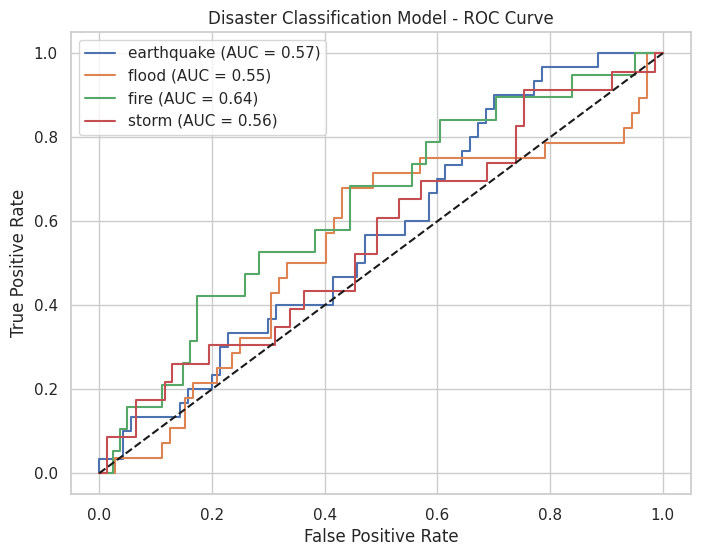

In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assume Y_test_bin are the true one-hot encoded labels, and Y_pred_probs are the predicted probabilities

# Plot ROC curve function
def plot_roc(y_test, y_pred, categories, title):
    fpr = {}
    tpr = {}
    roc_auc = {}

    # Loop over each class to calculate ROC curve and AUC
    for i in range(y_test.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curves for each class
    plt.figure(figsize=(8, 6))
    for i in range(y_test.shape[1]):
        plt.plot(fpr[i], tpr[i], label=f'{categories[i]} (AUC = {roc_auc[i]:.2f})')

    # Plot the random guessing line
    plt.plot([0, 1], [0, 1], 'k--')

    # Labels and title
    plt.title(f'{title} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage: Replace Y_test_bin and Y_pred_probs with your actual data
# Y_test_bin: One-hot encoded true labels
# Y_pred_probs: Predicted probabilities for each class
categories = ['earthquake', 'flood', 'fire', 'storm']  # Adjust according to your dataset
plot_roc(Y_test_bin, Y_pred_probs, categories, "Disaster Classification Model")


In [121]:
from statsmodels.stats.proportion import proportions_ztest

# Evaluate the model
loss, acc = cnn_rgb.evaluate(X_test_rgb, y_test_rgb, verbose=0)

# Print accuracy for clarity
print(f"\n✅ Model Evaluation Complete")
print(f"Model Accuracy: {acc:.4f}")

# Z-test Setup
n_classes = 5  # or len(classes)
p = acc                      # model accuracy
p0 = 1 / n_classes           # random guessing baseline
n = len(X_test_rgb)          # number of test samples

# Run Z-test
z_stat, p_value = proportions_ztest(count=p * n, nobs=n, value=p0, alternative='larger')

# Show results
print(f"Z-Statistic: {z_stat:.3f}")
print(f"P-Value: {p_value:.5f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("✅ Reject null hypothesis: Model performs significantly better than random guessing.")
else:
    print("⚠️ Fail to reject null: No significant difference from random guessing.")



✅ Model Evaluation Complete
Model Accuracy: 0.3450
Z-Statistic: 10.320
P-Value: 0.00000
✅ Reject null hypothesis: Model performs significantly better than random guessing.
